# Assignment 1 - PS11

**Group 128**

Group details as follows


|Name|BITS Id
| :---| :---
|[Vinayak Nayak](https://github.com/ElisonSherton)|2021fc04135
|[Niyati Gangwal](https://github.com/NiyatiGangwal)|2021fc04140
|[Shreysi Kalra](https://github.com/shreyasi25)|2021fc04586

# Problem Statement

🏥  Diabetes dataset to predict the risk of a person given the medical parameters

## Part A

Start exploration of the data and preprocess it

### Import Libraries/Dataset

Dataset is already downloaded and saved in the local disk in the same relative path as this notebook.

In [1]:
# Install necessary libraries quietly and update them to the latest version if already present
!pip install -q --upgrade pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

### Data Visualization and Exploration

<div class="alert alert-block alert-info" style="color:gray">Read the dataset. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</div>



In [3]:
df = pd.read_excel("./diabetes.xlsx")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


<div class="alert alert-block alert-info" style="color:gray">Print the description and Basic statistical details.</div>

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

***From: Kaggle.com PIMA Indians Diabetes Dataset***

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div class="alert alert-block alert-info" style="color:gray">Print each class label count (Activity) and create a pie chart for each class (% of data distribution). <br> Write your observation on data balancing</div>

In [18]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

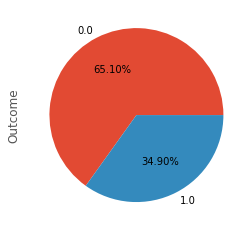

In [20]:
df.Outcome.value_counts().plot.pie(autopct="%.2f%%");

**Observation**

- Data is not balanced.
- We have higher proportion of healthier ladies i.e. non-diabetic ladies as opposed to diabetic ones.
- We might have to try some over/undersampling techniques to overcome this difference but the given dataset is not so severly unbalanced as well.
- Also it will be a good idea to perform split based on outcome such that we're stratifying to have equal distributions of 0/1s in both the training and validation sets.

<div class="alert alert-block alert-info" style="color:gray">Try exploring the data and see what insights can be drawn from the dataset.</div>

All our predictors are continuous numerical variables. Also, luckily we only have 8 predictors, so let us plot

- A scatterplot of every feature against every other feature and color it based on the outcome variable
- A Histogram of each numerical feature individually to understand the distribution of every feature but colored by outcome

/home/vinayak/anaconda3/envs/fastai2/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


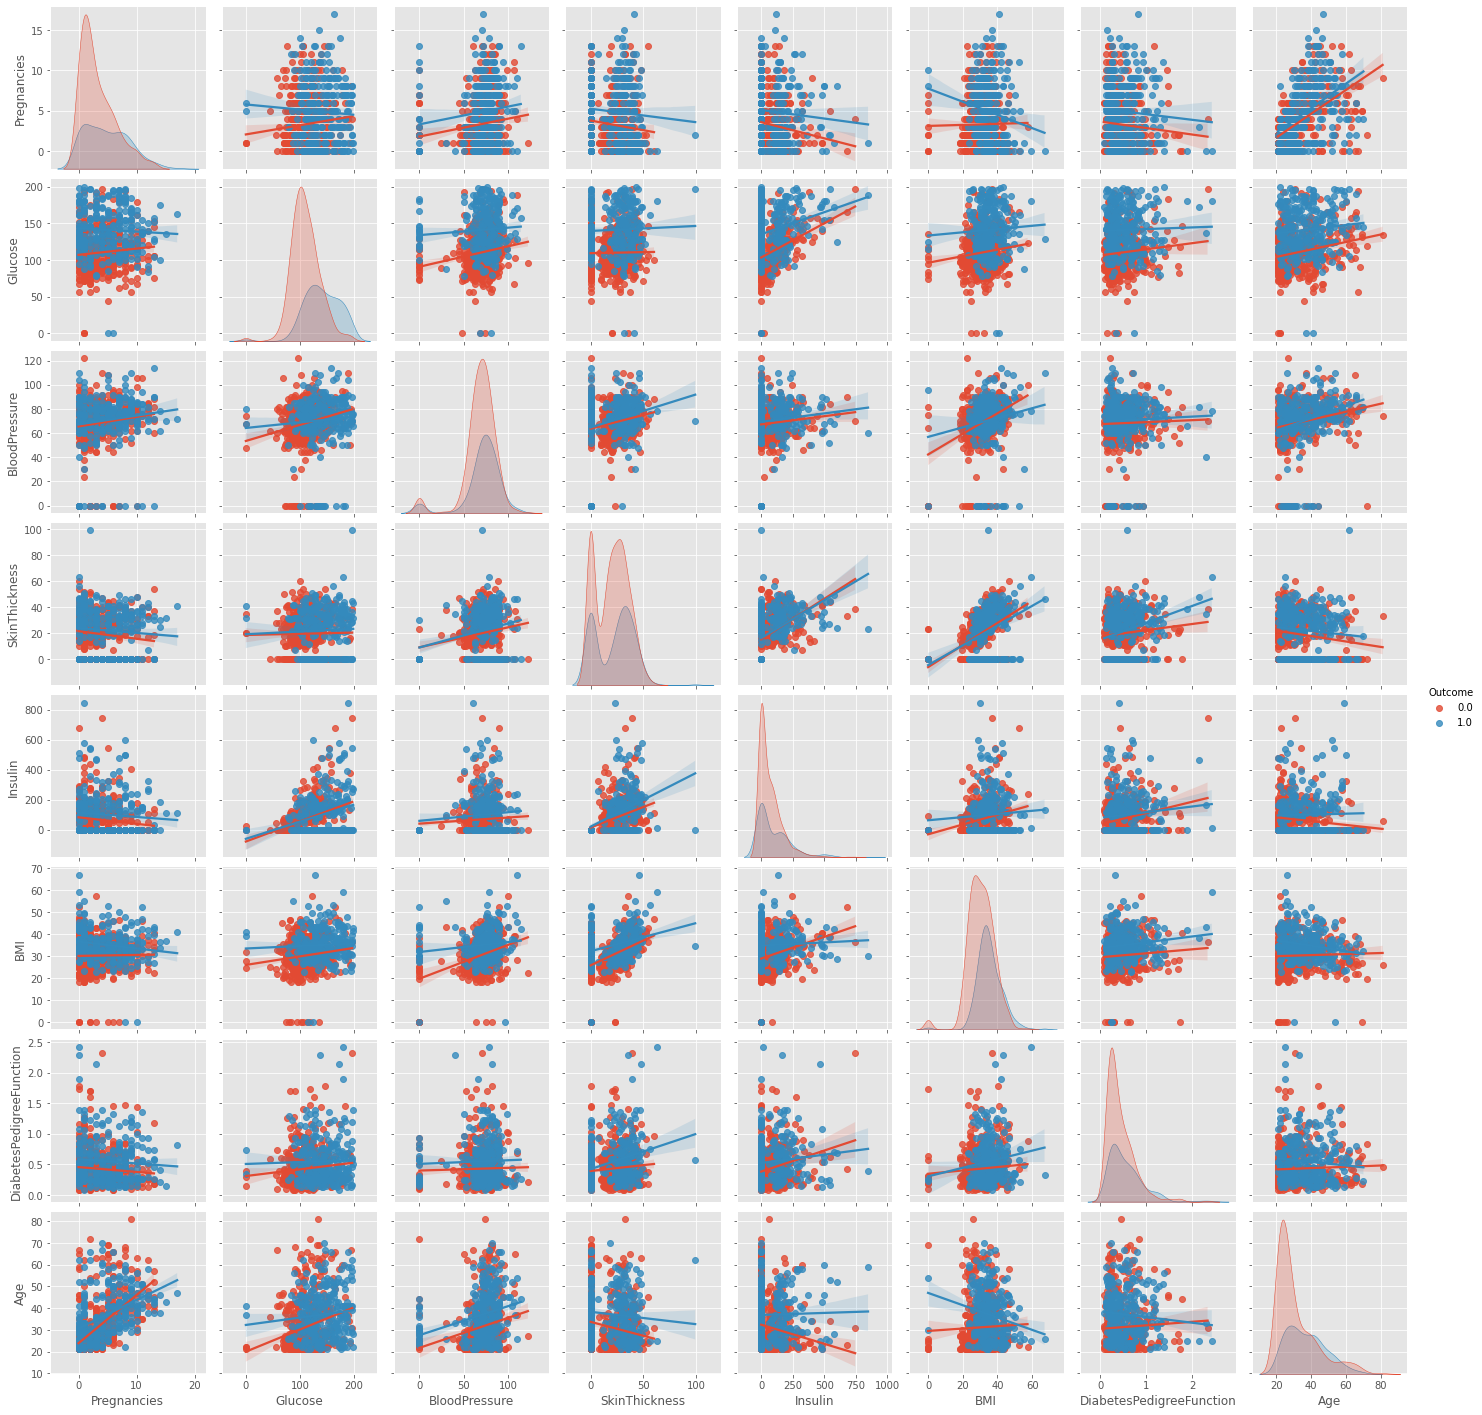

In [34]:
sns.pairplot(df, hue = "Outcome", diag_kind="kde", kind="reg", height = 2.5);

We can observe two things from above

<div class="alert alert-warning" style="color: gray;">

- **The distributions of the individual features colored by outcomes are almost overlapping.** This means that just by conditioning on any one feature, we would not get substantial information about the outcome feature.
- For all the pairplots, we can see that the regression lines for both the red and blue i.e. 0 and 1 classes respectively are almost parallel and close to each other.
- **Every feature has outliers** which is evident from how the shape of regression lines in the pairplots are influenced because of them (look at CIs of lines).
- Although the features don't have any null values, **there's a high chance that the missing values are encoded to be 0s** in some cases `eg. BMI, Blood Pressure` etc. cannot technically be zeros for any living human being. 
</div>

### Data Pre-processing and cleaning 



<div class="alert alert-info" style="color: gray;">
Do the appropriate preprocessing steps<br>Identify NULL or Missing Values based on column<br>Apply appropriate feature engineering techniques for them.
</div>

In [45]:
df[df != 0].isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We can observe that there's some alarming and some reasonable observations here

<div class="alert alert-danger" style="color: gray;">
    <b>Alarming Observations</b>
    <ul>
    <li>5 people had 0 glucose levels which is not possible for a living human being.</li>
    <li>35 records show BloodPressure of zero which is impossible for a living human being.</li> 
    <li>BMI of any human can't be zero because no human is weightless or has infinite height which is the case in 11 records.</li>
    <li>227 records show SkinThickness (triceps skin fold thickness) of 0 mm; this is usually 12 mm in males and 23 mm in females. So these are also anomalies.</li>
    </ul>
</div>

<div class="alert alert-success" style="color: gray;">
    <b>Reasonable Observations</b>
    <ul>
    <li>111 records have zero pregnancies. This dataset is of females over 21 years of age and it's possible that some women never got pregnant.</li>
    <li>374 records have zero insulin. This could be possible when a person has Type1 Diabetes so it's not an anomaly.</li>
    </ul>
</div>

In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
df[df != 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,268.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,1.0
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0
